In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("LEADINGCAUSESOFDEATH.csv")
data.head()

#to read about what columns contain: 
#https://github.com/potatochip/heart_disease_prediction/blob/master/datasets/Community%20Health%20Status%20Indicators%20(CHSI)%20to%20Combat%20Obesity%2C%20Heart%20Disease%20and%20Cancer%20Popular/DATAELEMENTDESCRIPTION.csv

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,A_Wh_Comp,CI_Min_A_Wh_Comp,CI_Max_A_Wh_Comp,A_Bl_Comp,...,F_Bl_Cancer,CI_Min_F_Bl_Cancer,CI_Max_F_Bl_Cancer,F_Ot_Cancer,CI_Min_F_Ot_Cancer,CI_Max_F_Ot_Cancer,F_Hi_Cancer,CI_Min_F_Hi_Cancer,CI_Max_F_Hi_Cancer,LCD_Time_Span
0,1,1,Autauga,Alabama,AL,29,-1111,-1111,-1111,-1111,...,19,14,23,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
1,1,3,Baldwin,Alabama,AL,16,57,39,75,-1111,...,20,15,25,-1111,-1111,-1111,-1111,-1111,-1111,2001-2003
2,1,5,Barbour,Alabama,AL,51,-1111,-1111,-1111,-1111,...,26,22,31,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
3,1,7,Bibb,Alabama,AL,42,-1111,-1111,-1111,-1111,...,20,14,25,-1111,-1111,-1111,-1111,-1111,-1111,1994-2003
4,1,9,Blount,Alabama,AL,28,34,17,52,-1111,...,28,10,46,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003


In [3]:
data.drop("CHSI_State_Abbr",axis=1, inplace=True)

In [4]:
data.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'Strata_ID_Number', 'A_Wh_Comp', 'CI_Min_A_Wh_Comp',
       'CI_Max_A_Wh_Comp', 'A_Bl_Comp', 'CI_Min_A_Bl_Comp',
       ...
       'F_Bl_Cancer', 'CI_Min_F_Bl_Cancer', 'CI_Max_F_Bl_Cancer',
       'F_Ot_Cancer', 'CI_Min_F_Ot_Cancer', 'CI_Max_F_Ot_Cancer',
       'F_Hi_Cancer', 'CI_Min_F_Hi_Cancer', 'CI_Max_F_Hi_Cancer',
       'LCD_Time_Span'],
      dtype='object', length=234)

In [5]:
data.shape

(3141, 234)

In [6]:
data.isna().sum()

State_FIPS_Code       0
County_FIPS_Code      0
CHSI_County_Name      0
CHSI_State_Name       0
Strata_ID_Number      0
                     ..
CI_Max_F_Ot_Cancer    0
F_Hi_Cancer           0
CI_Min_F_Hi_Cancer    0
CI_Max_F_Hi_Cancer    0
LCD_Time_Span         0
Length: 234, dtype: int64

In [7]:
data.dtypes

State_FIPS_Code        int64
County_FIPS_Code       int64
CHSI_County_Name      object
CHSI_State_Name       object
Strata_ID_Number       int64
                       ...  
CI_Max_F_Ot_Cancer     int64
F_Hi_Cancer            int64
CI_Min_F_Hi_Cancer     int64
CI_Max_F_Hi_Cancer     int64
LCD_Time_Span         object
Length: 234, dtype: object

In [8]:
#LCD_Time_Span-->Time period of reported data for national leading causes of death

data[['LCD_Time_start','LCD_Time_end']]=data.LCD_Time_Span.str.split('-',expand=True).astype('int64')
#expand: Boolean value, returns a data frame with different value in different columns if True. 
#Else it returns a series with list of strings.

In [9]:
data[['County_FIPS_Code','CHSI_County_Name','LCD_Time_start','LCD_Time_end']].head()

,County_FIPS_Code,CHSI_County_Name,LCD_Time_start,LCD_Time_end
0,1,Autauga,1999,2003
1,3,Baldwin,2001,2003
2,5,Barbour,1999,2003
3,7,Bibb,1994,2003
4,9,Blount,1999,2003


In [10]:
data.dtypes

State_FIPS_Code        int64
County_FIPS_Code       int64
CHSI_County_Name      object
CHSI_State_Name       object
Strata_ID_Number       int64
                       ...  
CI_Min_F_Hi_Cancer     int64
CI_Max_F_Hi_Cancer     int64
LCD_Time_Span         object
LCD_Time_start         int64
LCD_Time_end           int64
Length: 236, dtype: object

In [11]:
#sorting
data[['County_FIPS_Code','CHSI_County_Name','LCD_Time_start','LCD_Time_end']].sort_values(['LCD_Time_start','County_FIPS_Code','LCD_Time_end'], ascending=False).head(10)

,County_FIPS_Code,CHSI_County_Name,LCD_Time_start,LCD_Time_end
2948,810,Virginia Beach City,2001,2003
2943,760,Richmond City,2001,2003
2941,740,Portsmouth City,2001,2003
2937,710,Norfolk City,2001,2003
2936,700,Newport News City,2001,2003
2928,650,Hampton City,2001,2003
2918,550,Chesapeake City,2001,2003
1214,510,Baltimore City,2001,2003
1595,510,St. Louis City,2001,2003
2913,510,Alexandria City,2001,2003


## Visualize the data

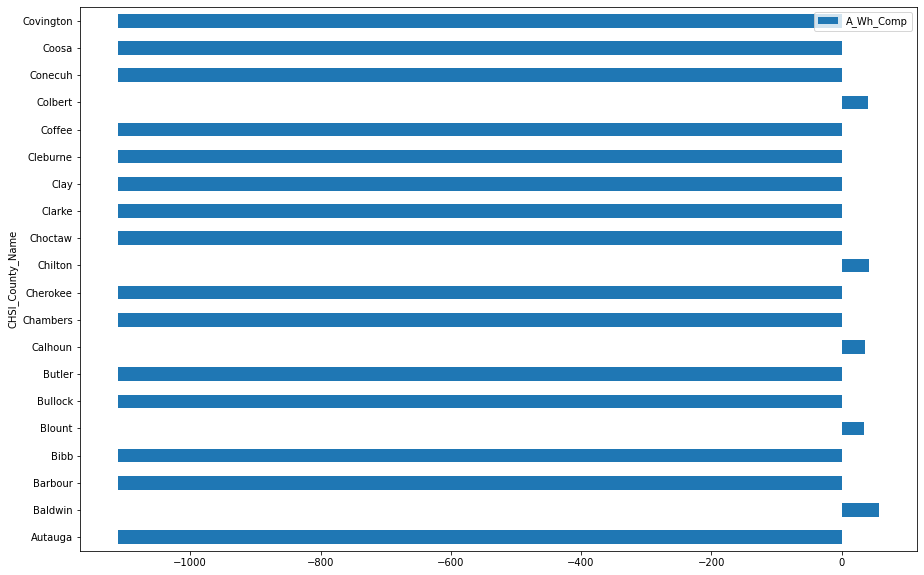

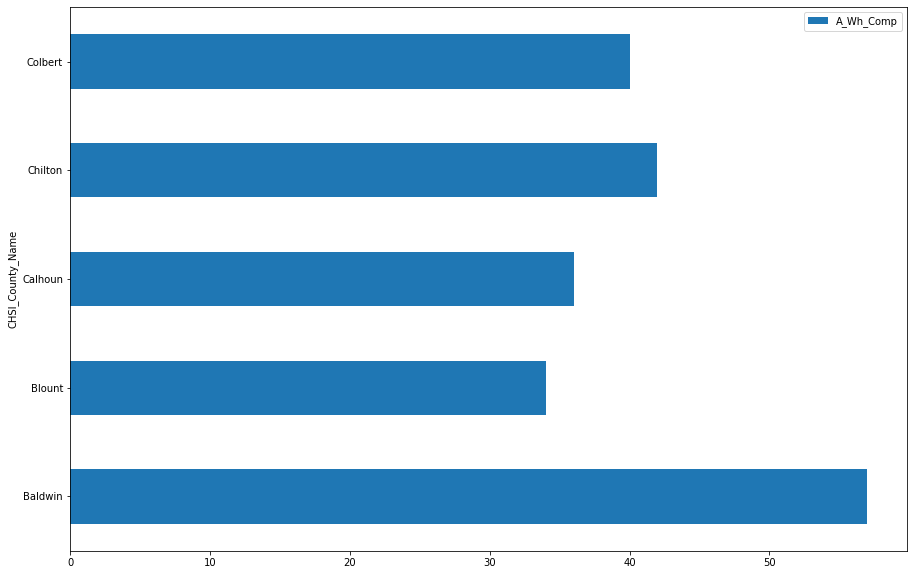

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

new_data = pd.read_csv("LEADINGCAUSESOFDEATH.csv").head(20)

# Quick inspection of the data
new_data.plot.barh(x='CHSI_County_Name', 
                y= 'A_Wh_Comp', #County data, under age 1, complications of pregnancy/birth, White
                figsize = (15, 10),
               )

# Filtering the output, data greater than 50 will only be shown.
new_data[new_data.A_Wh_Comp > 0].plot.barh(x='CHSI_County_Name', 
                                                y= 'A_Wh_Comp',
                                                figsize = (15, 10),
                                               )